In [167]:
# importamos librerias de nuestro interes para el proyecto
from google.colab import drive
from PIL import Image
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Análisis del Tiro Oblicuo desde la Perspectiva de la Energía



## Introducción
La energía de un objeto en movimiento se divide principalmente en dos formas: energía cinética (debido a su movimiento) y energía potencial (debido a su posición en el campo gravitacional).

### Energía Cinética (EC)
La energía cinética de un objeto se define como:
$$ \mathbf{Ec} = \frac{1}{2} \cdot \mathbf{m} \cdot V^2 $$

- Donde:
  - **m** representa la masa del objeto (en kilogramos, kg)
  -**V** representa la velocidad del objeto (en metros por segundo, m/s)

### Energía Potencial Gravitacional (EP)
La energía potencial gravitacional de un objeto se define como:
$$ \mathbf{Ep} = \mathbf{m} \cdot \mathbf{g} \cdot \mathbf{h} $$

- Donde:
  - **m** representa la masa del objeto (en kilogramos, kg)
  - **g**  representa la aceleración debida a la gravedad (aproximadamente 9.81 metros por segundo al cuadrado, m/s²)
  - **h** representa la altura del objeto respecto a una referencia (en metros, m)

### Energía Mecánica Total (EM)
La energía mecánica total de un objeto es la suma de su energía cinética y su energía potencial:
$$ \mathbf{Em} = \mathbf{Ep} + \mathbf{Ec} $$

- Donde:
  - **Ep** representa la energía potencial
  - **Ec** representa la energía cinética


## Objetivos del Análisis de Energía

1. Comprender los conceptos básicos de energía cinética, energía potencial y energía mecánica.
2. Determinar los cambios en energía cinética y potencial del balón durante su trayectoria en un tiro oblicuo.
3. Calcular la energía mecánica total en diferentes puntos de la trayectoria y verificar la conservación de la energía.
4. Comparar los resultados teóricos de energía con los datos experimentales obtenidos del análisis cinemático.
5. Evaluar la precisión de los modelos teóricos utilizados mediante la comparación con datos experimentales.

## Metodología

1. **Análisis Teórico**:
   - Se utilizarán ecuaciones de energía para calcular la energía cinética, energía potencial y energía mecánica en puntos clave de la trayectoria del balón.
   - Se predecirán los cambios en energía en función de diferentes condiciones iniciales, como la velocidad de lanzamiento y el ángulo de lanzamiento.

3. **Experimentos Prácticos**:
   - Utilizaremos los datos obtenidos sobre el tiro al aro del **Analisis sobre Cinematica**, con estos datos se medirán las velocidades y alturas en diferentes puntos de la trayectoria para calcular las energías correspondientes.

4. **Análisis de Datos**:
   - Se compararán los resultados teóricos de energía con los datos experimentales obtenidos.
   - Se evaluará la precisión de los modelos teóricos y se discutirán las posibles discrepancias entre los resultados teóricos y experimentales.

5. **Resultados Esperados**:
   - Determinación de la relación entre la energía cinética, energía potencial y la posición del balón en su trayectoria.
   - Identificación de patrones en los cambios de energía durante el movimiento en tiro oblicuo.
   - Validación de los modelos teóricos mediante la comparación con datos experimentales.
   - Conclusiones sobre la importancia de la conservación de la energía y su aplicación en el análisis de la física del tiro libre en el baloncesto.


# Analisis Teorico


En este analisis teorico vamos a partir del desarrollo de las ecuaciones de energia vistas en la catedra. Intentaremos calcular teoricamente a partir de los datos tomados en el experimento, vamos a calcular como se modifica la energia

In [168]:
df_ruta_teoria = '/content/drive/MyDrive/Fisica/data/data_teoria.csv'
df_ruta_exp = '/content/drive/MyDrive/Fisica/data/data_exp.csv'


In [169]:
# Leer el archivo CSV
df_teoria = pd.read_csv(df_ruta_teoria)

# Mostrar las primes filas del archivo CSV
df_teoria.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pos_x_teoria    106 non-null    float64
 1   pos_y_teoria    106 non-null    float64
 2   tiempos_teoria  106 non-null    float64
 3   vel_x_teoria    106 non-null    float64
 4   vel_y_teoria    106 non-null    float64
 5   acc_x_teoria    106 non-null    float64
 6   acc_y_teoria    106 non-null    float64
dtypes: float64(7)
memory usage: 5.9 KB


In [170]:
# Leer el archivo CSV
df_exp = pd.read_csv(df_ruta_exp)

# Mostrar las primes filas del archivo CSV
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PosX_metros  32 non-null     float64
 1   PosY_metros  32 non-null     float64
 2   Tiempo       32 non-null     float64
 3   VelX         32 non-null     float64
 4   VelY         32 non-null     float64
 5   AccX         32 non-null     float64
 6   AccY         32 non-null     float64
dtypes: float64(7)
memory usage: 1.9 KB


#Tomamos los dataset de teoria y practica sobre el analisis del tiro parabolico


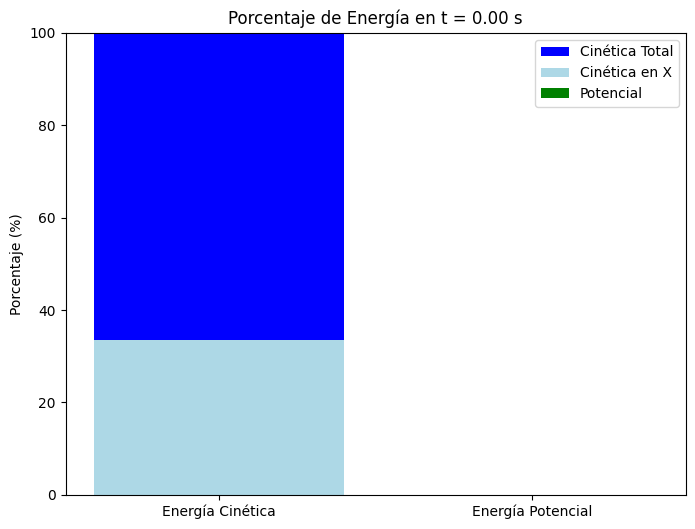

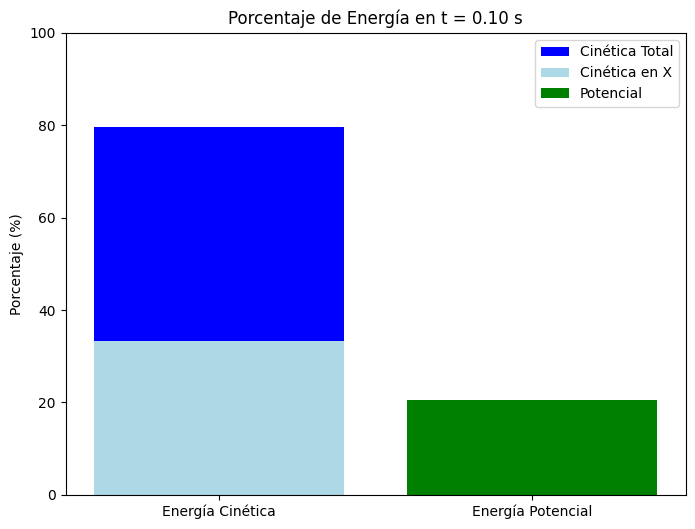

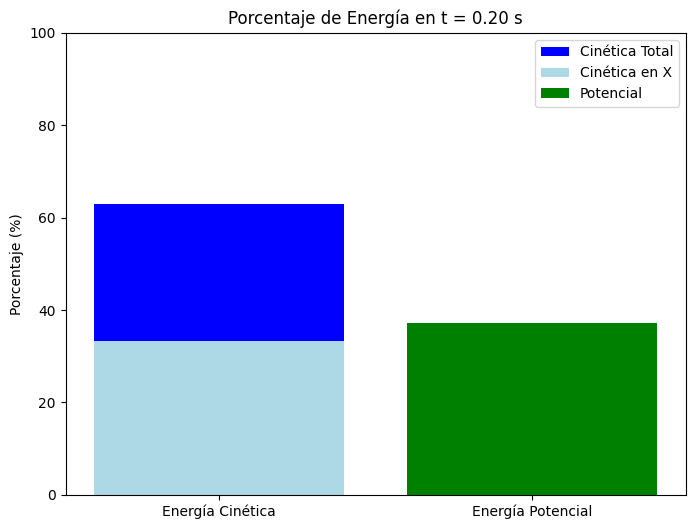

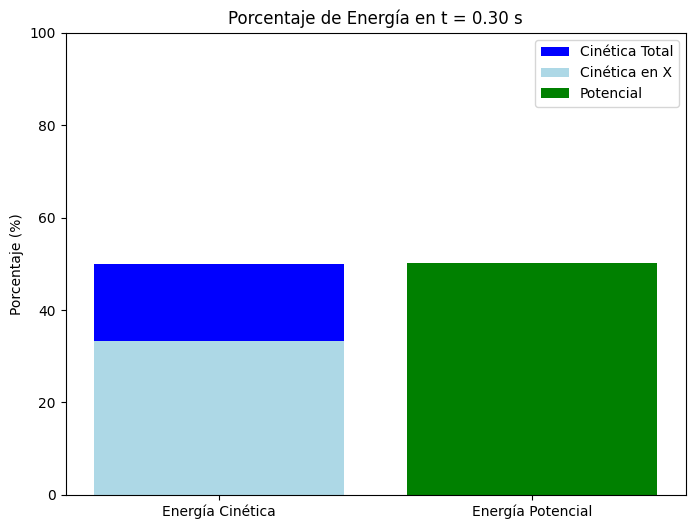

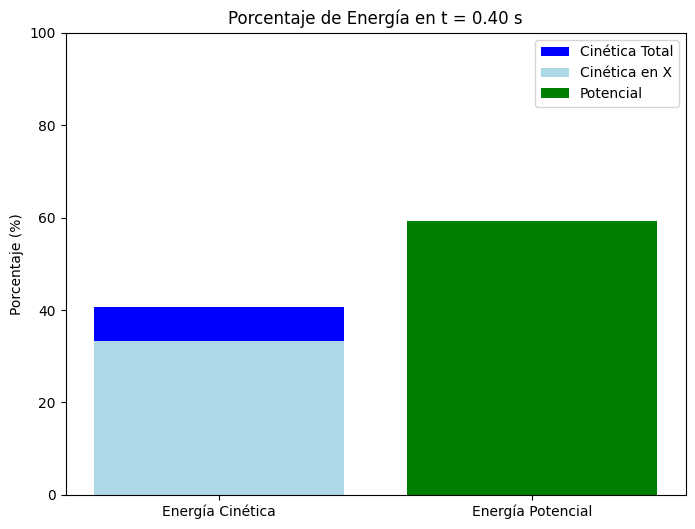

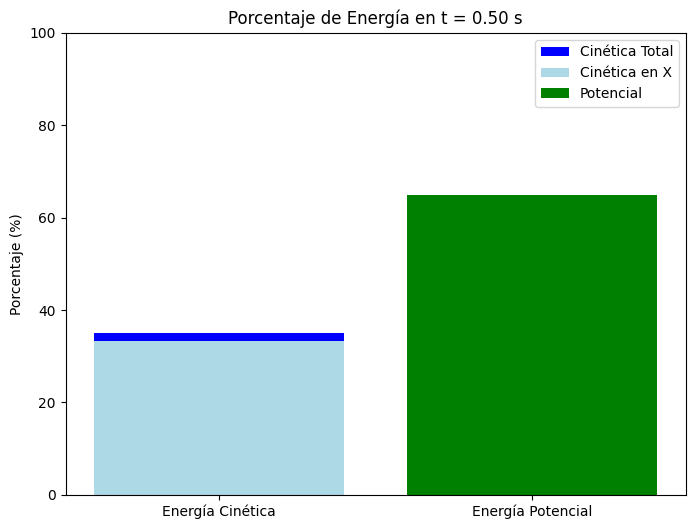

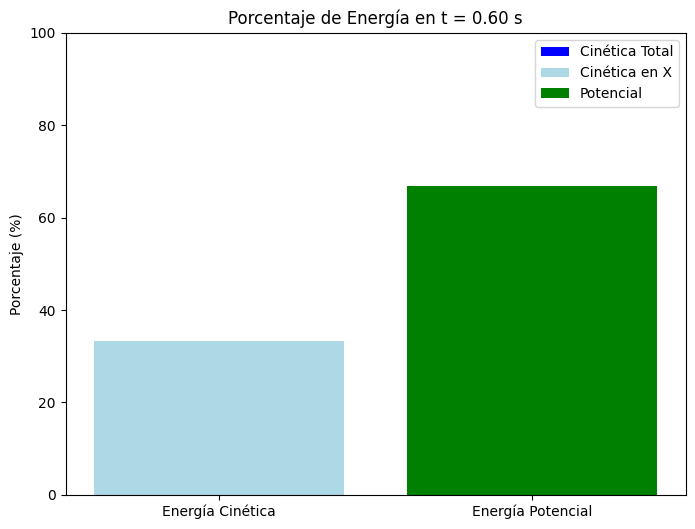

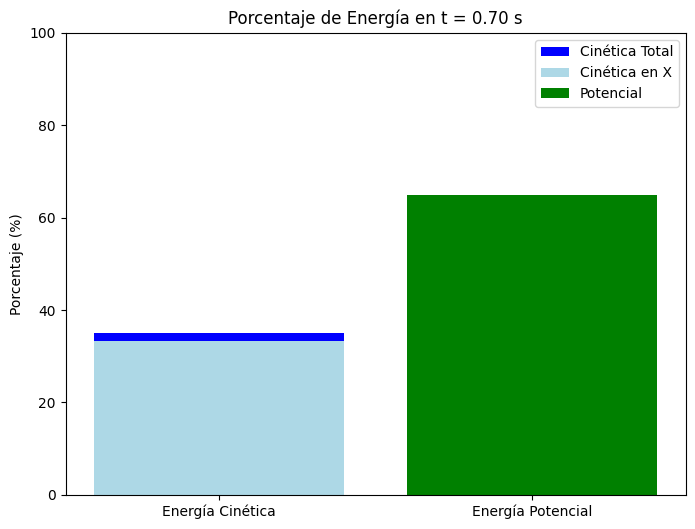

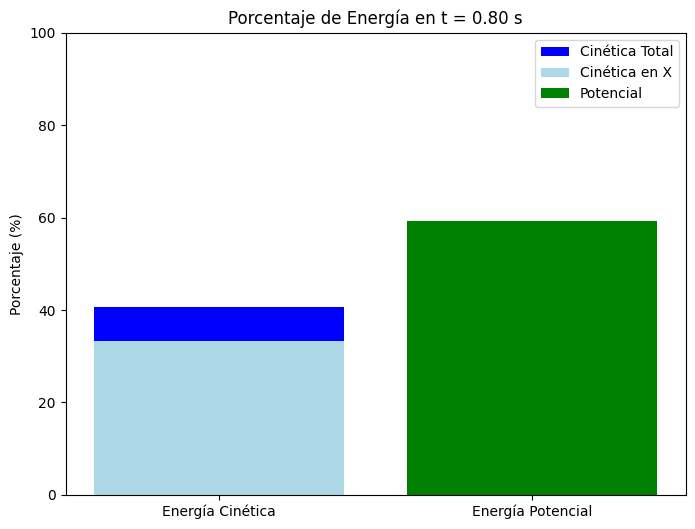

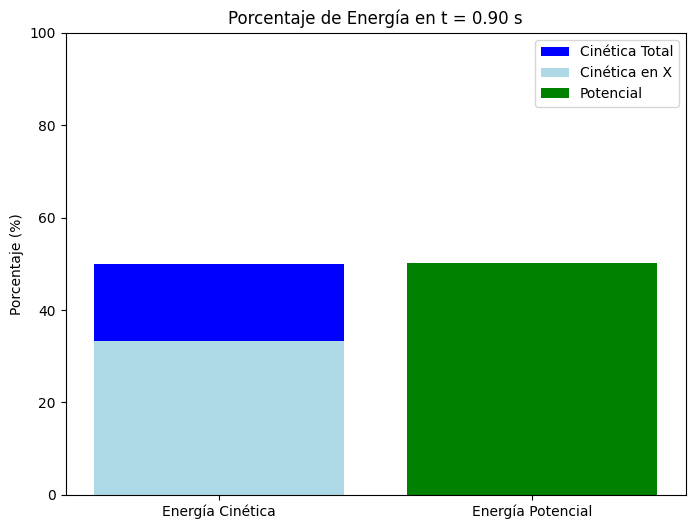

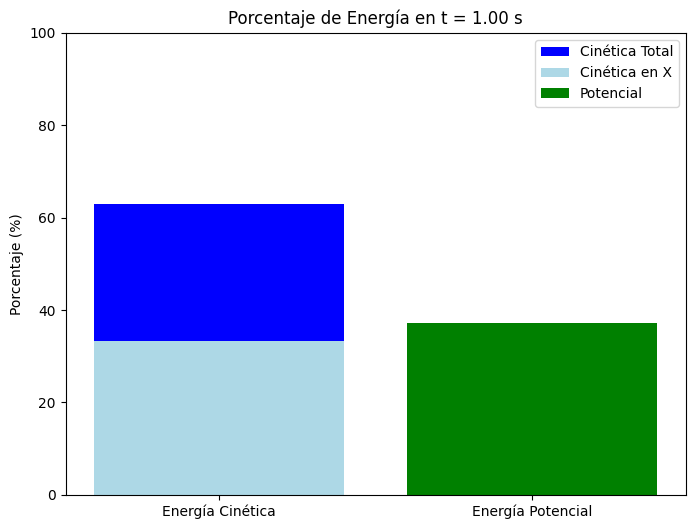

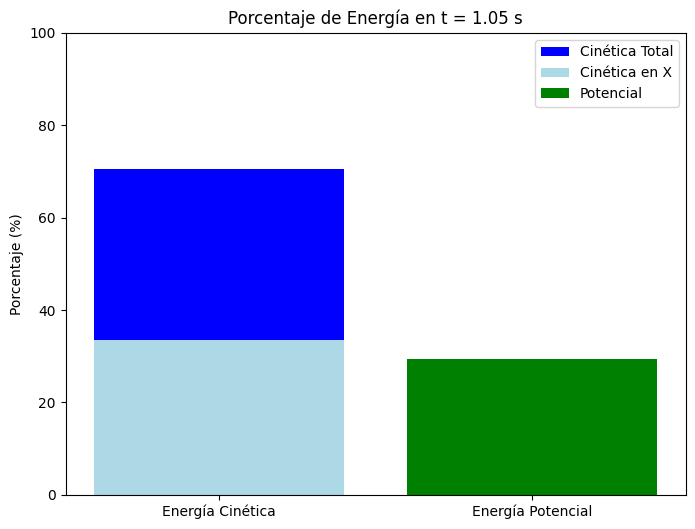

In [171]:

g = 9.81  # aceleración de la gravedad en m/s^2
m = 0.625  # masa del objeto en kg

# Corrimiento del eje y a cero en el momento que se lanza la pelota
df_teoria['pos_y_teoria'] = df_teoria['pos_y_teoria'] - df_teoria['pos_y_teoria'].iloc[0]

# Calcular las energías cinéticas en x y en y, y la energía potencial
df_teoria['energia_cinetica_x'] = 0.5 * m * df_teoria['vel_x_teoria']**2
df_teoria['energia_cinetica_y'] = 0.5 * m * df_teoria['vel_y_teoria']**2
df_teoria['energia_cinetica'] = df_teoria['energia_cinetica_x'] + df_teoria['energia_cinetica_y']
df_teoria['energia_potencial'] = m * g * df_teoria['pos_y_teoria']

# Calcular la energía mecánica total
df_teoria['energia_mecanica_total'] = df_teoria['energia_cinetica'] + df_teoria['energia_potencial']

def mostrar_porcentaje_energia(df, tiempo_punto):
    # Encontrar el punto más cercano al tiempo dado
    punto_mas_cercano = df.iloc[(df['tiempos_teoria'] - tiempo_punto).abs().argmin()]

    # Extraer las energías en ese punto
    energia_cinetica_x = punto_mas_cercano['energia_cinetica_x']
    energia_cinetica_y = punto_mas_cercano['energia_cinetica_y']
    energia_potencial = punto_mas_cercano['energia_potencial']
    energia_total = punto_mas_cercano['energia_mecanica_total']

    # Evitar división por cero
    if energia_total == 0:
        porcentaje_cinetica_x = 0
        porcentaje_cinetica_y = 0
        porcentaje_potencial = 0
    else:
        # Calcular porcentajes
        porcentaje_cinetica_x = (energia_cinetica_x / energia_total) * 100
        porcentaje_cinetica_y = (energia_cinetica_y / energia_total) * 100
        porcentaje_potencial = (energia_potencial / energia_total) * 100

    # Crear el gráfico de barras apiladas
    plt.figure(figsize=(8, 6))
    plt.bar(['Energía Cinética'], [porcentaje_cinetica_x + porcentaje_cinetica_y], color='blue', label='Cinética Total')
    plt.bar(['Energía Cinética'], [porcentaje_cinetica_x], color='lightblue', label='Cinética en X')
    plt.bar(['Energía Potencial'], [porcentaje_potencial], color='green', label='Potencial')
    plt.title(f'Porcentaje de Energía en t = {punto_mas_cercano["tiempos_teoria"]:.2f} s')
    plt.ylabel('Porcentaje (%)')
    plt.ylim(0, 100)
    plt.legend()
    plt.show()

# Ejemplo de uso
tiempo_punto = 0.2 # Puedes cambiar esto por el tiempo que desees analizar
mostrar_porcentaje_energia(df_teoria, 0.0)
mostrar_porcentaje_energia(df_teoria, 0.1)
mostrar_porcentaje_energia(df_teoria, 0.2)
mostrar_porcentaje_energia(df_teoria, 0.3)
mostrar_porcentaje_energia(df_teoria, 0.4)
mostrar_porcentaje_energia(df_teoria, 0.5)
mostrar_porcentaje_energia(df_teoria, 0.6)
mostrar_porcentaje_energia(df_teoria, 0.7)
mostrar_porcentaje_energia(df_teoria, 0.8)
mostrar_porcentaje_energia(df_teoria, 0.9)
mostrar_porcentaje_energia(df_teoria, 1.0)
mostrar_porcentaje_energia(df_teoria, 1.1)



In [172]:
df_teoria.head()


,pos_x_teoria,pos_y_teoria,tiempos_teoria,vel_x_teoria,vel_y_teoria,acc_x_teoria,acc_y_teoria,energia_cinetica_x,energia_cinetica_y,energia_cinetica,energia_potencial,energia_mecanica_total
0,0.000000,0.000000,0.00,4.150943,5.83695,0.000000e+00,-4.9050,5.384478,10.646870,16.031349,0.000000,16.031349
1,0.041509,0.058369,0.01,4.150943,5.78790,8.526513e-14,-7.3575,5.384478,10.468683,15.853162,0.357878,16.211040
2,0.083019,0.115758,0.02,4.150943,5.68980,0.000000e+00,-9.8100,5.384478,10.116820,15.501298,0.709741,16.211040
3,0.124528,0.172165,0.03,4.150943,5.59170,-1.136868e-13,-9.8100,5.384478,9.770972,15.155450,1.055590,16.211040
4,0.166038,0.227592,0.04,4.150943,5.49360,8.526513e-14,-9.8100,5.384478,9.431138,14.815616,1.395423,16.211040


In [149]:
df_teoria.drop(columns=[  "pos_x_teoria", "pos_y_teoria", "vel_x_teoria", "vel_y_teoria","acc_x_teoria","acc_y_teoria"], inplace=True)
df_teoria.head()

,tiempos_teoria,energia_cinetica_x,energia_cinetica_y,energia_cinetica,energia_potencial,energia_mecanica_total
0,0.00,5.384478,10.646870,16.031349,0.000000,16.031349
1,0.01,5.384478,10.468683,15.853162,0.357878,16.211040
2,0.02,5.384478,10.116820,15.501298,0.709741,16.211040
3,0.03,5.384478,9.770972,15.155450,1.055590,16.211040
4,0.04,5.384478,9.431138,14.815616,1.395423,16.211040


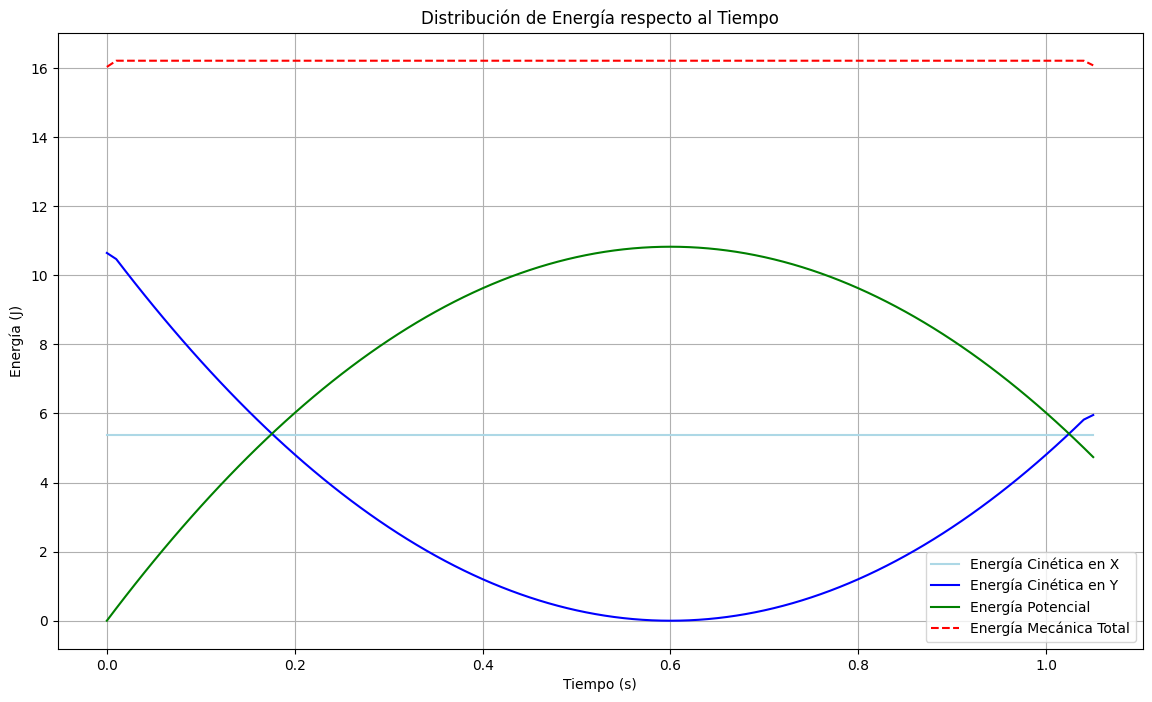

In [150]:
# Crear un gráfico de línea mostrando la distribución de la energía respecto al tiempo

# Plotting the energy distribution over time
plt.figure(figsize=(14, 8))
plt.plot(df_teoria['tiempos_teoria'], df_teoria['energia_cinetica_x'], label='Energía Cinética en X', color='lightblue')
plt.plot(df_teoria['tiempos_teoria'], df_teoria['energia_cinetica_y'], label='Energía Cinética en Y', color='blue')
plt.plot(df_teoria['tiempos_teoria'], df_teoria['energia_potencial'], label='Energía Potencial', color='green')
plt.plot(df_teoria['tiempos_teoria'], df_teoria['energia_mecanica_total'], label='Energía Mecánica Total', color='red', linestyle='--')

plt.title('Distribución de Energía respecto al Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (J)')
plt.legend()
plt.grid(True)
plt.show()


In [153]:
df_exp.head()

,PosX_metros,PosY_metros,Tiempo,VelX,VelY,AccX,AccY
0,0.000000,2.200000,0.000000,3.703704,5.185185,5.555556e+00,3.703704
1,0.123457,2.372840,0.033333,3.888889,5.308642,5.555556e+00,0.925926
2,0.259259,2.553909,0.066667,4.074074,5.246914,3.703704e+00,-5.555556
3,0.395062,2.722634,0.100000,4.135802,4.938272,1.851852e+00,-10.185185
4,0.534979,2.883128,0.133333,4.197531,4.567901,-2.131628e-14,-11.111111


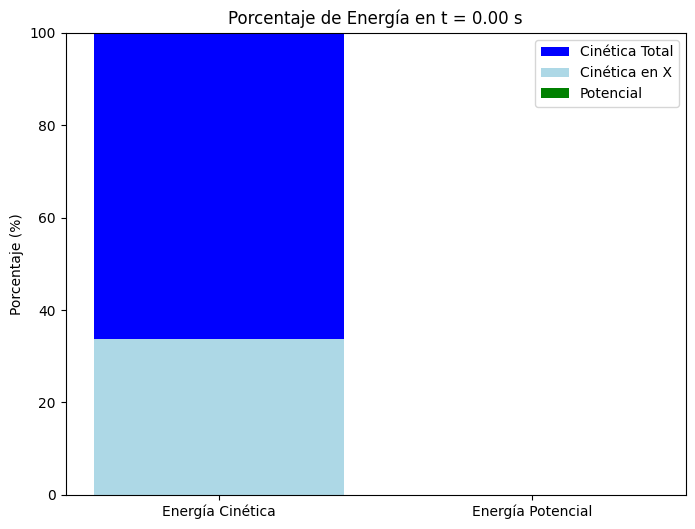

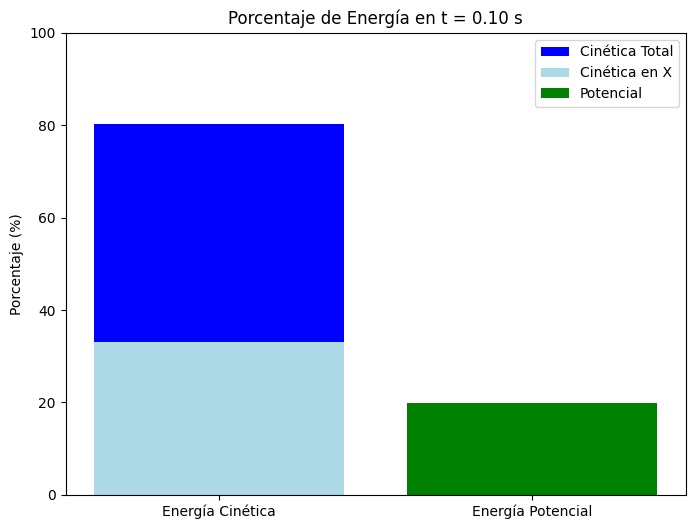

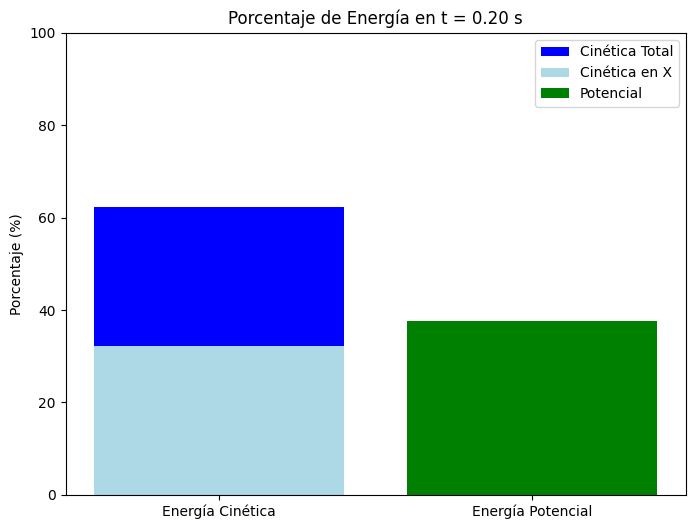

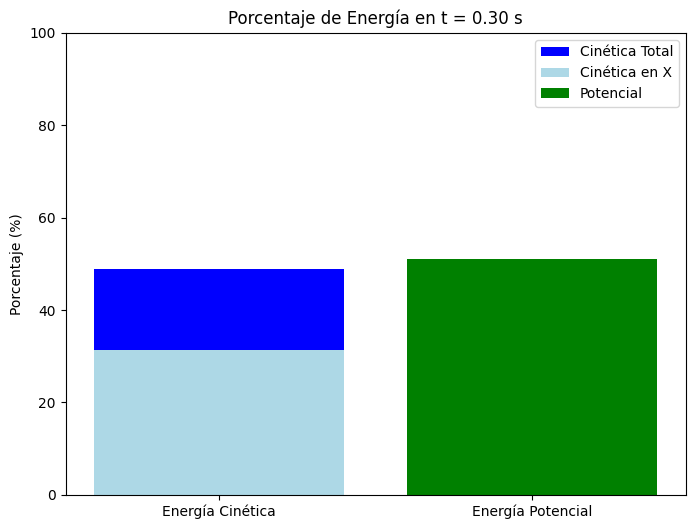

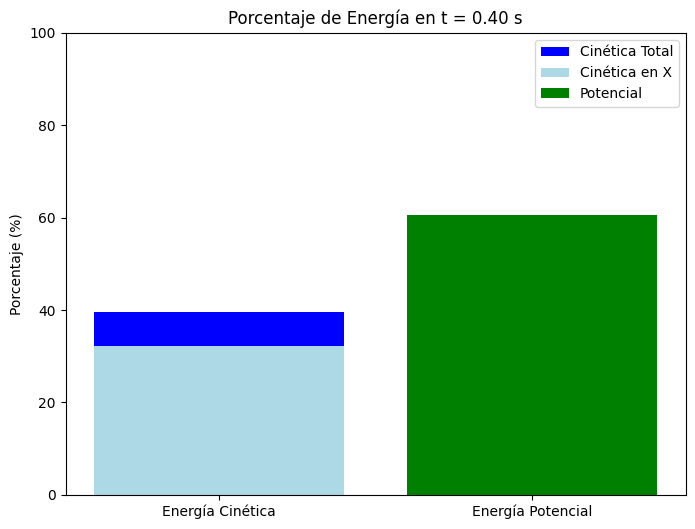

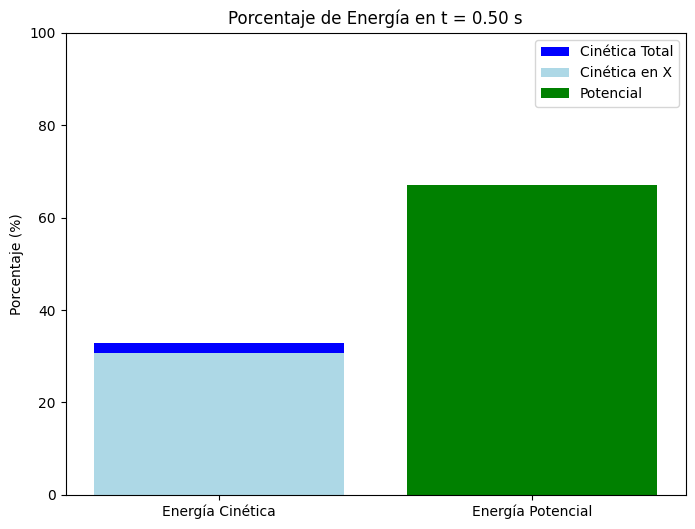

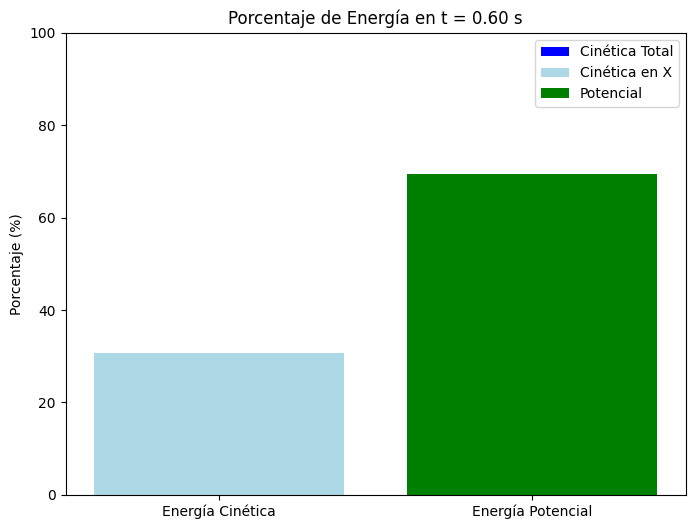

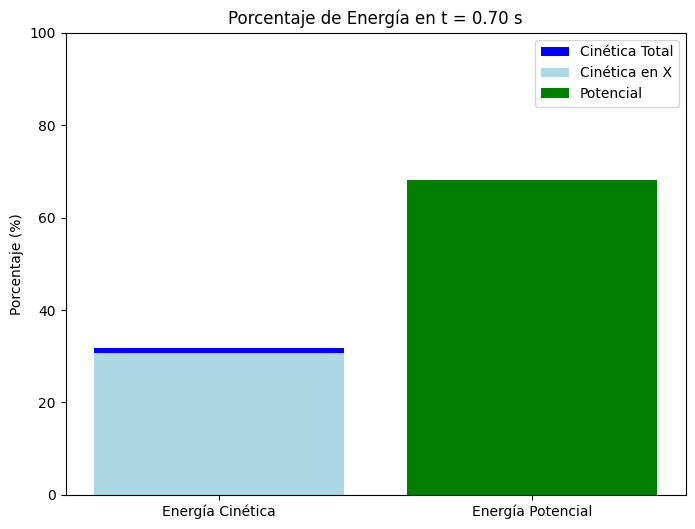

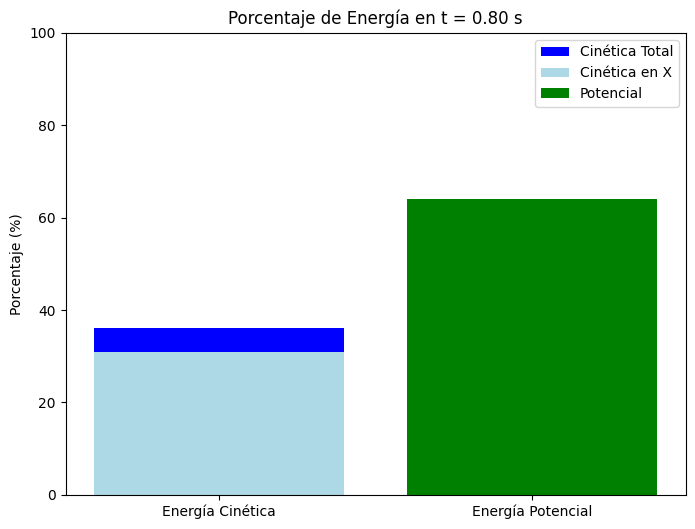

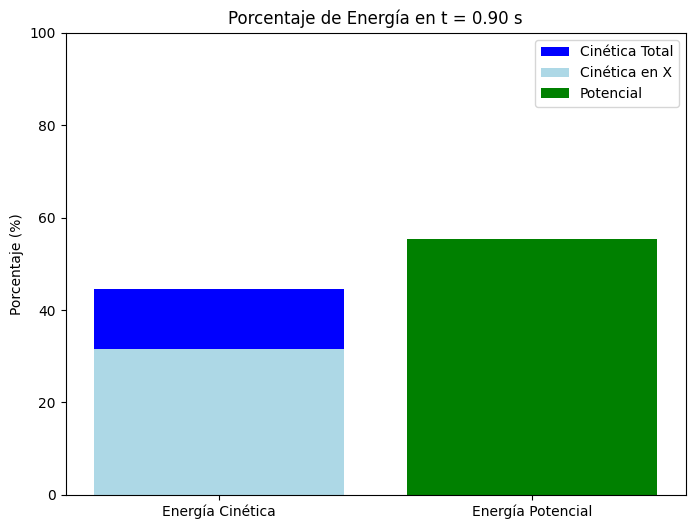

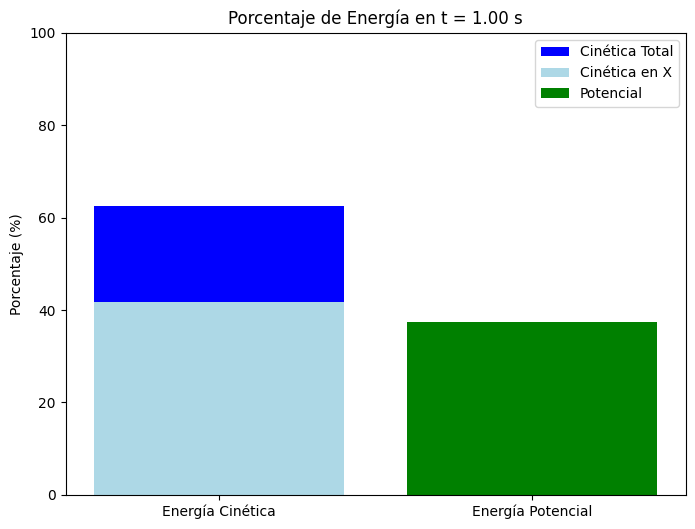

In [159]:


g = 9.81  # aceleración de la gravedad en m/s^2
m = 0.625  # masa del objeto en kg

# Corrimiento del eje y a cero en el momento que se lanza la pelota
df_exp['PosY_metros'] = df_exp['PosY_metros'] - df_exp['PosY_metros'].iloc[0]

# Calcular las energías cinéticas en x y en y, y la energía potencial
df_exp['energia_cinetica_x'] = 0.5 * m * df_exp['VelX']**2
df_exp['energia_cinetica_y'] = 0.5 * m * df_exp['VelY']**2
df_exp['energia_cinetica'] = df_exp['energia_cinetica_x'] + df_exp['energia_cinetica_y']
df_exp['energia_potencial'] = m * g * df_exp['PosY_metros']

# Calcular la energía mecánica total
df_exp['energia_mecanica_total'] = df_exp['energia_cinetica'] + df_exp['energia_potencial']

def mostrar_porcentaje_energia_exp(df, tiempo_punto):
    # Encontrar el punto más cercano al tiempo dado
    punto_mas_cercano = df.iloc[(df['Tiempo'] - tiempo_punto).abs().argmin()]

    # Extraer las energías en ese punto
    energia_cinetica_x = punto_mas_cercano['energia_cinetica_x']
    energia_cinetica_y = punto_mas_cercano['energia_cinetica_y']
    energia_potencial = punto_mas_cercano['energia_potencial']
    energia_total = punto_mas_cercano['energia_mecanica_total']

    # Evitar división por cero
    if energia_total == 0:
        porcentaje_cinetica_x = 0
        porcentaje_cinetica_y = 0
        porcentaje_potencial = 0
    else:
        # Calcular porcentajes
        porcentaje_cinetica_x = (energia_cinetica_x / energia_total) * 100
        porcentaje_cinetica_y = (energia_cinetica_y / energia_total) * 100
        porcentaje_potencial = (energia_potencial / energia_total) * 100

    # Crear el gráfico de barras apiladas
    plt.figure(figsize=(8, 6))
    plt.bar(['Energía Cinética'], [porcentaje_cinetica_x + porcentaje_cinetica_y], color='blue', label='Cinética Total')
    plt.bar(['Energía Cinética'], [porcentaje_cinetica_x], color='lightblue', label='Cinética en X')
    plt.bar(['Energía Potencial'], [porcentaje_potencial], color='green', label='Potencial')
    plt.title(f'Porcentaje de Energía en t = {punto_mas_cercano["Tiempo"]:.2f} s')
    plt.ylabel('Porcentaje (%)')
    plt.ylim(0, 100)
    plt.legend()
    plt.show()

mostrar_porcentaje_energia_exp(df_exp, 0.0)
mostrar_porcentaje_energia_exp(df_exp, 0.1)
mostrar_porcentaje_energia_exp(df_exp, 0.2)
mostrar_porcentaje_energia_exp(df_exp, 0.3)
mostrar_porcentaje_energia_exp(df_exp, 0.4)
mostrar_porcentaje_energia_exp(df_exp, 0.5)
mostrar_porcentaje_energia_exp(df_exp, 0.6)
mostrar_porcentaje_energia_exp(df_exp, 0.7)
mostrar_porcentaje_energia_exp(df_exp, 0.8)
mostrar_porcentaje_energia_exp(df_exp, 0.9)
mostrar_porcentaje_energia_exp(df_exp, 1)


In [160]:
df_exp.head()

,PosX_metros,PosY_metros,Tiempo,VelX,VelY,AccX,AccY,energia_cinetica_x,energia_cinetica_y,energia_cinetica,energia_potencial,energia_mecanica_total
0,0.000000,0.000000,0.000000,3.703704,5.185185,5.555556e+00,3.703704,4.286694,8.401920,12.688615,0.000000,12.688615
1,0.123457,0.172840,0.033333,3.888889,5.308642,5.555556e+00,0.925926,4.726080,8.806775,13.532855,1.059722,14.592577
2,0.259259,0.353909,0.066667,4.074074,5.246914,3.703704e+00,-5.555556,5.186900,8.603157,13.790057,2.169907,15.959964
3,0.395062,0.522634,0.100000,4.135802,4.938272,1.851852e+00,-10.185185,5.345269,7.620790,12.966059,3.204398,16.170457
4,0.534979,0.683128,0.133333,4.197531,4.567901,-2.131628e-14,-11.111111,5.506020,6.520538,12.026558,4.188426,16.214984


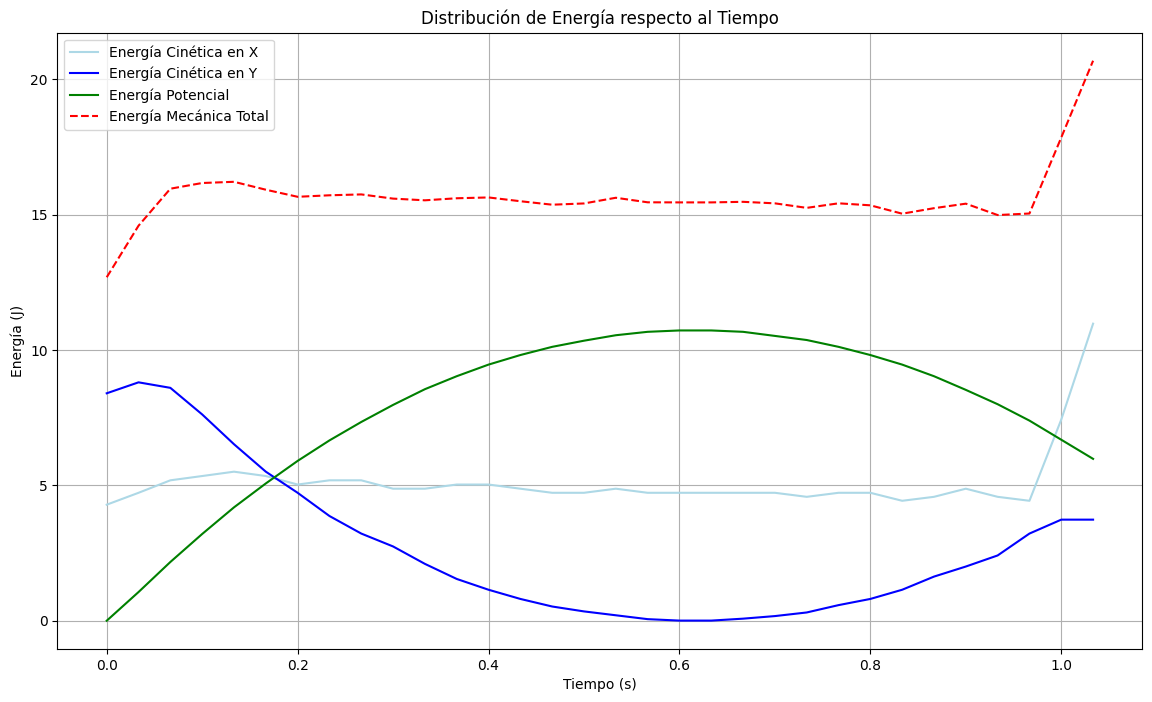

In [161]:
plt.figure(figsize=(14, 8))
plt.plot(df_exp['Tiempo'], df_exp['energia_cinetica_x'], label='Energía Cinética en X', color='lightblue')
plt.plot(df_exp['Tiempo'], df_exp['energia_cinetica_y'], label='Energía Cinética en Y', color='blue')
plt.plot(df_exp['Tiempo'], df_exp['energia_potencial'], label='Energía Potencial', color='green')
plt.plot(df_exp['Tiempo'], df_exp['energia_mecanica_total'], label='Energía Mecánica Total', color='red', linestyle='--')

plt.title('Distribución de Energía respecto al Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (J)')
plt.legend()
plt.grid(True)
plt.show()


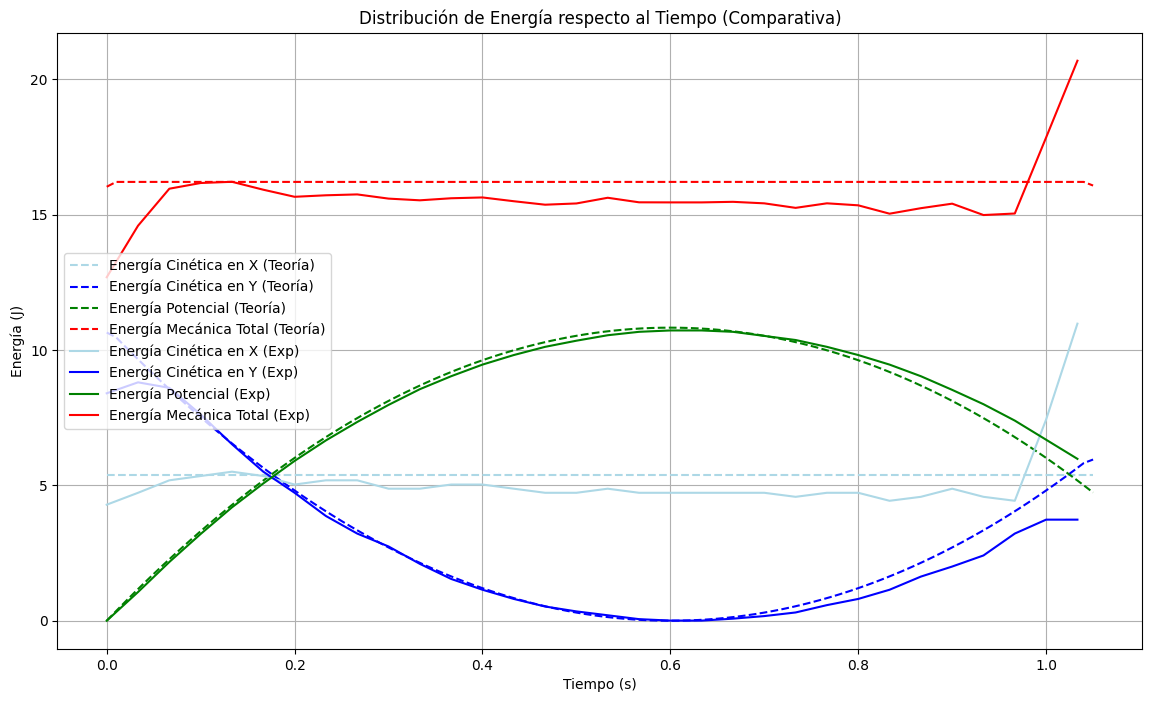

In [162]:

# Crear el gráfico comparativo
plt.figure(figsize=(14, 8))

# Dataset teórico
plt.plot(df_teoria['tiempos_teoria'], df_teoria['energia_cinetica_x'], label='Energía Cinética en X (Teoría)', color='lightblue', linestyle='--')
plt.plot(df_teoria['tiempos_teoria'], df_teoria['energia_cinetica_y'], label='Energía Cinética en Y (Teoría)', color='blue', linestyle='--')
plt.plot(df_teoria['tiempos_teoria'], df_teoria['energia_potencial'], label='Energía Potencial (Teoría)', color='green', linestyle='--')
plt.plot(df_teoria['tiempos_teoria'], df_teoria['energia_mecanica_total'], label='Energía Mecánica Total (Teoría)', color='red', linestyle='--')

# Nuevo dataset
plt.plot(df_exp['Tiempo'], df_exp['energia_cinetica_x'], label='Energía Cinética en X (Exp)', color='lightblue')
plt.plot(df_exp['Tiempo'], df_exp['energia_cinetica_y'], label='Energía Cinética en Y (Exp)', color='blue')
plt.plot(df_exp['Tiempo'], df_exp['energia_potencial'], label='Energía Potencial (Exp)', color='green')
plt.plot(df_exp['Tiempo'], df_exp['energia_mecanica_total'], label='Energía Mecánica Total (Exp)', color='red')

plt.title('Distribución de Energía respecto al Tiempo (Comparativa)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (J)')
plt.legend()
plt.grid(True)
plt.show()